In [42]:
# Mohammad Ali Zahir
# Student ID: 40077619
# COMP 333 - Data Analytics
# Objective: By using the pandas library, produce some similar plots from the dataset
# Source: "./Assignment1/tips.csv"
# Output: Plots from the following url: https://en.wikipedia.org/wiki/Exploratory_data_analysis

In [43]:
# # Installing the proper librairies
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib

In [44]:
# Importing the required libraries

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [45]:
# Reading the CSV file and seeing if it friends
tips_data = pd.read_csv("./tips.csv" ,delimiter=',')

# Create variable for the first 10 rows
first_10_row =tips_data.head(10)

# Prints the first 10 rows 
print(first_10_row)


   Unnamed: 0  total_bill   tip     sex smoker  day    time  size
0           1       16.99  1.01  Female     No  Sun  Dinner     2
1           2       10.34  1.66    Male     No  Sun  Dinner     3
2           3       21.01  3.50    Male     No  Sun  Dinner     3
3           4       23.68  3.31    Male     No  Sun  Dinner     2
4           5       24.59  3.61  Female     No  Sun  Dinner     4
5           6       25.29  4.71    Male     No  Sun  Dinner     4
6           7        8.77  2.00    Male     No  Sun  Dinner     2
7           8       26.88  3.12    Male     No  Sun  Dinner     4
8           9       15.04  1.96    Male     No  Sun  Dinner     2
9          10       14.78  3.23    Male     No  Sun  Dinner     2


[Text(0.5, 0, 'Total Bill'), Text(0.5, 1.0, 'Total Bill Boxplot')]

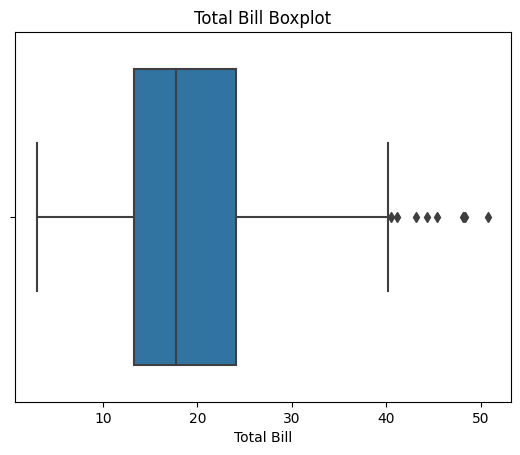

In [46]:
# Creating the boxplot for the total bill
box_tip = sns.boxplot(data=tips_data, x="total_bill")
box_tip.set(xlabel="Total Bill", title = "Total Bill Boxplot")



[Text(0.5, 0, 'Total Bill'),
 Text(0, 0.5, 'Tips'),
 Text(0.5, 1.0, 'Tips vs Total Bill')]

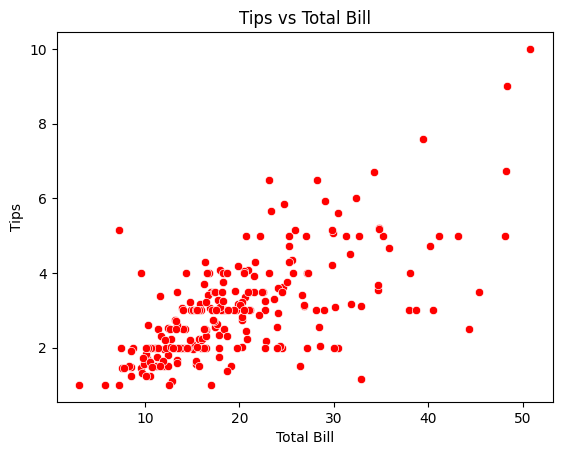

In [47]:
# Creating a sns scatterplot

tip_scatter1 = sns.scatterplot(data=tips_data, x="total_bill", y="tip", color="red")

tip_scatter1.set(xlabel="Total Bill", ylabel="Tips", title="Tips vs Total Bill")

[Text(0.5, 0, 'Size'),
 Text(0, 0.5, 'Tip Rate'),
 Text(0.5, 1.0, 'Tip Rate vs Party Size ScatterPlot')]

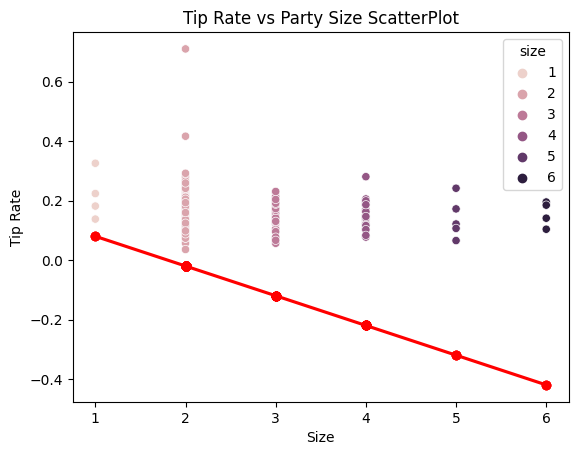

In [48]:
# Creating the definition for tip rate and linear tip rate and adding them to the dataset 
tips_data['tip_rate'] = tips_data['tip'] / tips_data['total_bill']
tips_data['linear_tip_rate'] = 0.18 - 0.1*tips_data['size']

# Setting the labels and printing the lmplot to create the straight line 
tip_rate_scatter = sns.scatterplot(x= 'size', y='tip_rate', data = tips_data, hue='size')
sns.regplot(data = tips_data, x = 'size', y = 'linear_tip_rate', color="red")

tip_rate_scatter.set(xlabel='Size', ylabel='Tip Rate', title='Tip Rate vs Party Size ScatterPlot')




In [54]:
# Creating a newdataset from the initial but removing all the non-smokers
smokers_tip_data=tips_data[tips_data.smoker != 'No']

smokers_tip_data.head()


,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size,tip_rate,linear_tip_rate,total_sum
56,57,38.01,3.00,Male,Yes,Sat,Dinner,4,0.078927,-0.22,41.01
58,59,11.24,1.76,Male,Yes,Sat,Dinner,2,0.156584,-0.02,13.00
60,61,20.29,3.21,Male,Yes,Sat,Dinner,2,0.158206,-0.02,23.50
61,62,13.81,2.00,Male,Yes,Sat,Dinner,2,0.144823,-0.02,15.81
62,63,11.02,1.98,Male,Yes,Sat,Dinner,2,0.179673,-0.02,13.00


[Text(0.5, 0, 'Total Bill'),
 Text(0, 0.5, 'Smoker'),
 Text(0.5, 1.0, 'Smoker vs Total Bill Boxplot')]

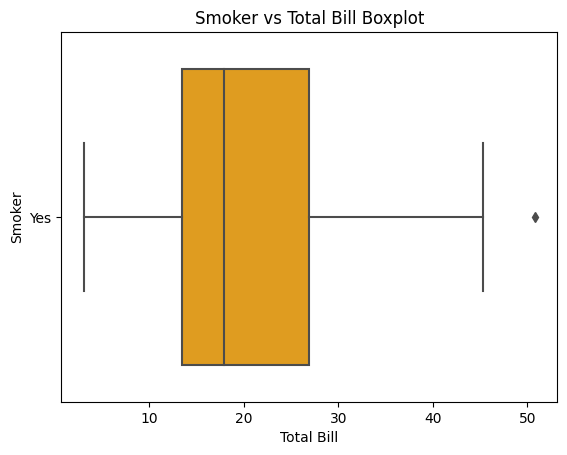

In [56]:
# creating a boxplot for smokers
smokers_boxplot = sns.boxplot(data = smokers_tip_data, x='total_bill', y = 'smoker', color = 'orange')
smokers_boxplot.set(xlabel="Total Bill", ylabel="Smoker", title="Smoker vs Total Bill Boxplot")



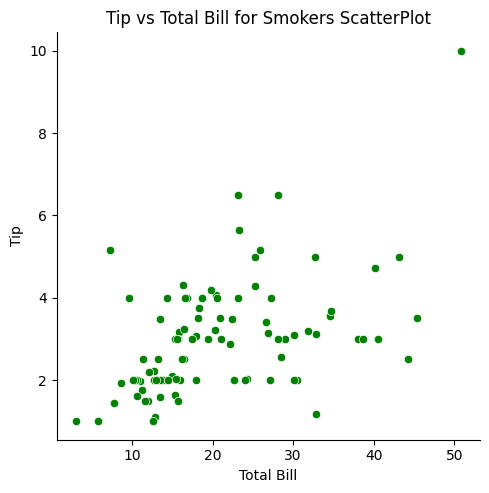

In [58]:
# Creating a sns scatterplot for smokers

# Using replot here to seperate the smokers from the non-smokers
scatter_smokers1 = sns.relplot(data=smokers_tip_data, x ='total_bill', y='tip', color='green', col='smoker')
scatter_smokers1.set(xlabel='Total Bill',ylabel='Tip', title= 'Tip vs Total Bill for Smokers ScatterPlot')

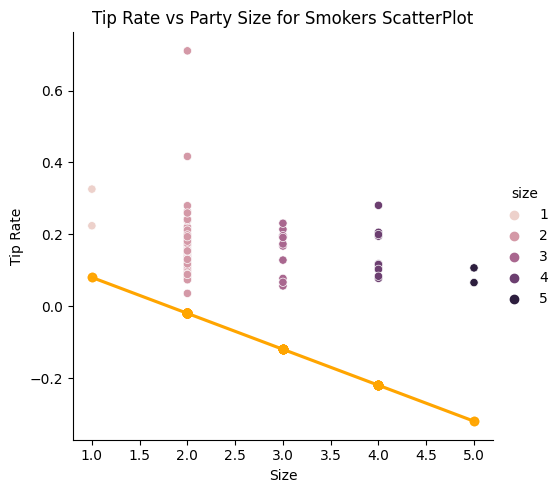

In [59]:
# Creating the tiprate and linear tip rate scatter plot for the smokers

smoker_scatter = sns.relplot(data=smokers_tip_data, x = 'size', y = 'tip_rate', col='smoker', hue='size')

#Adding the linear regression line for the linear tip rate scatter plot
sns.regplot(data=smokers_tip_data, x = 'size', y = 'linear_tip_rate', color='orange')
smoker_scatter.set(xlabel='Size', ylabel='Tip Rate', title = 'Tip Rate vs Party Size for Smokers ScatterPlot')



[Text(0.5, 0, 'Total Sum'), Text(0.5, 1.0, 'Total Sum Histogram')]

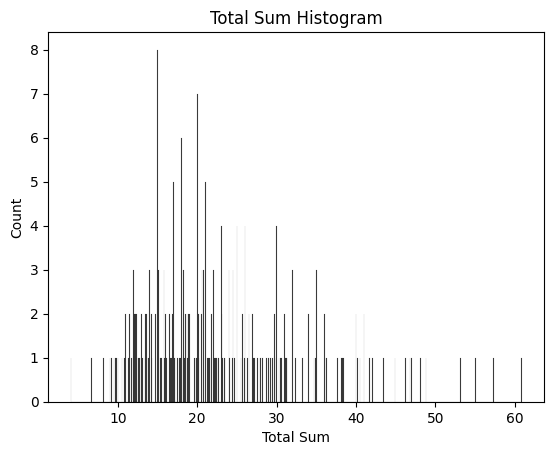

In [53]:
# Creating a column for the total sum
tips_data['total_sum'] = tips_data.iloc[:,[1,2]].sum(axis=1)

#Create the histogram with a width of 0.1 to represent the 10 cent increments
total_hist = sns.histplot(data= tips_data['total_sum'],binwidth=0.1, color='black')
total_hist.set(xlabel='Total Sum', title='Total Sum Histogram')